# Functions

In [1]:
# prevents warnings from being printed only in this cell
import warnings
warnings.filterwarnings("ignore")
import pickle

from matplotlib.pyplot import *
from scipy import interpolate

%pylab inline
warnings.filterwarnings("default")

from isomerization_lib import *

%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Opsin data

In [2]:
fsave = './PhotoReceptorData'
PhData = load_obj(fsave)                        # Photo Receptors Data

Opsins=[]                                       # Opsins matrix initialization

Opsins.append(PhData['Scones'])                 # S cones
Opsins.append(PhData['Mela'])                   # Melanopsin
Opsins.append(PhData['Rods'])                   # Rods
Opsins.append(PhData['Mcones'])                 # M cones
Opsins.append(PhData['RedOpsin'])               # Red Opsin

x = PhData['x_axis']                            # Wavelength axis

# Creating a dictionary with indexes for each opsin
OpsinIndex = {'S-cone':0,'Melano':1,'Rhodo':2,'M-cone':3,'Redo':4}


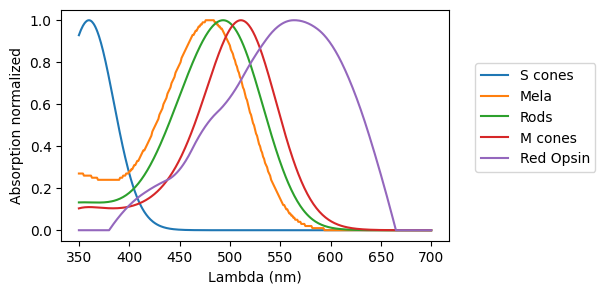

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))

for o in Opsins:
    ax.plot(x,o)

ax.set_xlabel('Lambda (nm)')    
ax.set_ylabel('Absorption normalized')

# move legend out of the plot
ax.legend(['S cones','Mela','Rods','M cones','Red Opsin'], bbox_to_anchor=(1.05, 0.8))


# Load LEDs illumination Data

In [4]:
fsave = './IlluminationDataMEA2'
IData = load_obj(fsave)                                     # Illumination Data Load

LEDs =[]                                                    # LEDs matrix initialization                                
LEDs.append(IData['Violet'])                                # Violet        
LEDs.append(IData['Blue'])                                  # Blue
LEDs.append(IData['Green'])                                 # Green
LEDs.append(IData['Yellow'])                                # Yellow
LEDs.append(IData['Red'])                                   # Red

x = IData['x_axis']                                         # Wavelength axis

# Power meter correction factor from 09/09/22
correction_f = 1                                        

LEDs=np.array(LEDs)/correction_f                            # Correction

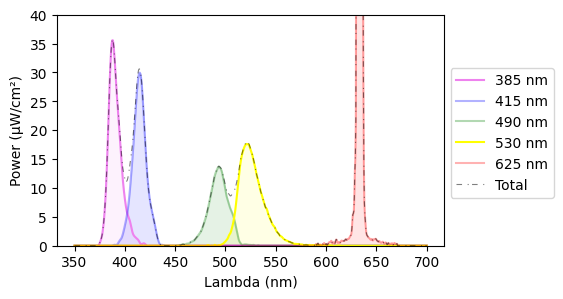

In [11]:
full_on_color_settings = [1,1,1,1,1]                        # Full on color settings
plot_spectrum(LEDs,x, full_on_color_settings, ylim = [0,40])       # Plotting LEDs


# Calculate Isomerizations

## Compute Isomerization for all opsins for all LEDs sources

In [12]:
print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM VIOLET LED')

# Get effect from Violet
VIOLET_ISO_result = IlluminanceFactor(LEDs[0],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(VIOLET_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM BLUE LED')

# Get effect from Blue
BLUE_ISO_result = IlluminanceFactor(LEDs[1],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(BLUE_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM GREEN LED')

# Get effect from Green
GREEN_ISO_result = IlluminanceFactor(LEDs[2],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(GREEN_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM YELLOW LED')

# Get effect from Yellow
YELLOW_ISO_result = IlluminanceFactor(LEDs[3],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(YELLOW_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM RED LED')

# Get effect from RED
RED_ISO_result = IlluminanceFactor(LEDs[4],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(RED_ISO_result,F=0)

print ('\n')




-----------------------------
EFFECTS FROM VIOLET LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     926469
Melanopsin  :     499454
Rhodopsin   :     761849
Mcones      :     211537
Red_opsin   :     133091


-----------------------------
EFFECTS FROM BLUE LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     207797
Melanopsin  :     772089
Rhodopsin   :    1325039
Mcones      :     282238
Red_opsin   :     348531


-----------------------------
EFFECTS FROM GREEN LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         65
Melanopsin  :    1454706
Rhodopsin   :    3854789
Mcones      :    1377817
Red_opsin   :     941918


-----------------------------
EFFECTS FROM YELLOW LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          3
Melanopsin  :    1217198
Rhodopsin   :    4458878
Mcones      :    2262678
Red_

In [13]:
# Get effect from All together

ISO_result = IlluminanceFactor(np.sum(LEDs[0:4],axis=0),Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1134334
Melanopsin  :    3943447
Rhodopsin   :   10400555
Mcones      :    4134269
Red_opsin   :    3611956

Scones      : 1.13e+06
Melanopsin  : 3.94e+06
Rhodopsin   : 1.04e+07
Mcones      : 4.13e+06
Red_opsin   : 3.61e+06


### Compute rhodopsin / M-opsin ratio for each source

In [14]:
OpsinIndex

{'S-cone': 0, 'Melano': 1, 'Rhodo': 2, 'M-cone': 3, 'Redo': 4}

### Compute ratios among different opsins for the same LED source

This operation is usefull in order to quantify how much a single led influences three main opsins which are:
 - M opsin
 - Rhodopsin
 - S opsin


## Yellow 🟡 and Green 🟢 LED sources **(LOW Energy Source)**

Will indicate with $I^M_Y$ the isomerization of M-Opsin due to Yellow LED source

Will indicate with $I^M_G$ the isomerization of M-Opsin due to Green LED source

### What is the effect of Yellow and Green LED sources on Rhodopsin?

Will indicate with $I^{Rho}_Y$ the isomerization of Rhodopsin due to Yellow LED source

Will indicate with $I^{Rho}_G$ the isomerization of Rhodopsin due to Green LED source

Proportionality coefficents are defined as:

$r_{MY} = \frac{I^{Rho}_Y}{I^M_Y}$

$r_{MG} = \frac{I^{Rho}_G}{I^M_G}$

### What is the effect of Yellow and Green LED sources on S-Opsin?

No effect



## Violet 🟣 LED source **(HIGH Energy Source)**

Will indicate with $I^M_V$ the isomerization of M-Opsin due to Violet LED source

### What is the effect of Violet LED source on Rhodopsin ?

Will indicate with $I^{Rho}_V$ the isomerization of Rhodopsin due to Violet LED source

Proportionality coefficent defined as:

$r_{MV} = \frac{I^{Rho}_V}{I^M_V}$

### What is the effect of Violet LED source on S-Opsin?

Will indicate with $I^{S}_V$ the isomerization of S-Opsin due to Violet LED source

Proportionality coefficent defined as:

$s_{MV} = \frac{I^{S}_V}{I^M_V}$



Summarizing table:

| LED source | M-Opsin | Rhodopsin | S-Opsin |
| --- | --- | --- | --- |
| 🟡 | $I^M_Y$ | $r_{MY} I^M_Y$ | 0 |
| 🟢 | $I^M_G$ | $r_{MG} I^M_G$ | 0 |
| 🔴 | $I^M_R$ | $r_{MR} I^M_R$ | 0 |
| 🟣 | $I^M_V$ | $r_{MV} I^M_V$ | $s_{MV} I^M_V$ |
| 🔵 | $I^M_B$ | $r_{MB} I^M_B$ | $s_{MB} I^M_B$ |


## Re-referencing to Yellow LED source

In order to have an independent representation of the effect of each LED from the exact number of isomerizations, we can re-reference the isomerizations to the Yellow LED source on the M-Opsin.

This means that we will divide each isomerization by the isomerization of the M-Opsin due to the Yellow LED source.

#### $\alpha = \frac{I^M_V}{I^M_Y}$          

###### -> intuitively 🟣 / 🟡

#### $\beta = \frac{I^M_G}{I^M_Y}$           

###### -> intuitively 🟢 / 🟡

#### $\gamma = \frac{I^M_B}{I^M_Y}$

###### -> intuitively 🔵 / 🟡

In [15]:
r_MV = VIOLET_ISO_result[OpsinIndex['Rhodo']] / VIOLET_ISO_result[OpsinIndex['M-cone']]
r_MB = BLUE_ISO_result[OpsinIndex['Rhodo']] / BLUE_ISO_result[OpsinIndex['M-cone']]
r_MG = GREEN_ISO_result[OpsinIndex['Rhodo']] / GREEN_ISO_result[OpsinIndex['M-cone']]
r_MY = YELLOW_ISO_result[OpsinIndex['Rhodo']] / YELLOW_ISO_result[OpsinIndex['M-cone']]
r_MR = RED_ISO_result[OpsinIndex['Rhodo']] / RED_ISO_result[OpsinIndex['M-cone']]

print ('\n')
print ('---------------------------------------')
print ('ratio Rhodo/Mcone for each LED')
print ('---------------------------------------')
print ('VIOLET  ',r_MV)
print ('BLUE    ',r_MB)
print ('GREEN   ',r_MG)
print ('YELLOW  ',r_MY)
print ('RED     ',r_MR)
print ('---------------------------------------')

s_MV = VIOLET_ISO_result[OpsinIndex['S-cone']] / VIOLET_ISO_result[OpsinIndex['M-cone']]
s_MB = BLUE_ISO_result[OpsinIndex['S-cone']] / BLUE_ISO_result[OpsinIndex['M-cone']]

print ('\n')
print ('---------------------------------------')
print ('ratio Scone/Mcone for high energy LEDs')
print ('---------------------------------------')
print ('VIOLET  ',s_MV)
print ('BLUE    ',s_MB)
print ('---------------------------------------')




---------------------------------------
ratio Rhodo/Mcone for each LED
---------------------------------------
VIOLET   3.601496127747575
BLUE     4.694752856058446
GREEN    2.797751888327726
YELLOW   1.970620148400624
RED      0.49288204674586505
---------------------------------------


---------------------------------------
ratio Scone/Mcone for high energy LEDs
---------------------------------------
VIOLET   4.379708210145938
BLUE     0.7362474727586781
---------------------------------------


## Repeat for (Human) White Light Illumination


25.000000000000007

<Figure size 640x480 with 0 Axes>

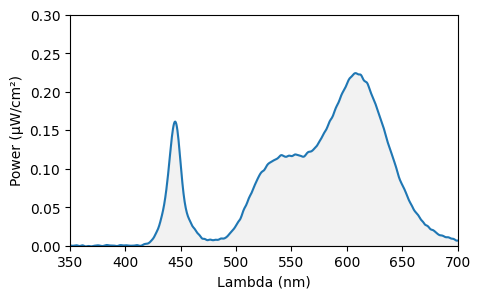

In [16]:
# Load LED data (for white in this case)
file_cal = 'cal_with_MEA2_matias.pkl'
caldata =load_obj(file_cal)

lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0


#--------------------------------------------------------------------------------
# White Spec for Vis Stim
figure()
WhiteVisPower = 25

WhiteVS = spec_curves[5]/np.sum(spec_curves[5])/diff(lx)[10]  * WhiteVisPower

f = interpolate.interp1d(lx,WhiteVS)
newWvis = f(x)/np.sum(f(x))*np.sum(WhiteVS)*diff(lx)[10]/diff(x)[0]

fig , ax = plt.subplots(figsize=(5, 3))

ax.plot(x,newWvis)
ax.fill_between(x,0,newWvis,alpha=0.1, color='grey')

ax.set_xlim([350,700])
ax.set_ylim([0,0.3])
ax.set_xlabel('Lambda (nm)')
ax.set_ylabel('Power (µW/cm²)')

np.sum(newWvis)*diff(x)[10]

In [20]:
# Get effect from White at Vis stim in 2p Setup

ISO_result = IlluminanceFactor(newWvis,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         89
Melanopsin  :      22069
Rhodopsin   :      69974
Mcones      :      33646
Red_opsin   :     102293

Scones      : 8.85e+01
Melanopsin  : 2.21e+04
Rhodopsin   : 7.00e+04
Mcones      : 3.36e+04
Red_opsin   : 1.02e+05


In [21]:
# Get effect from White at OPTO full field

WhiteOptoPower = 71900/correction_f
ISO_result = IlluminanceFactor(newWvis/np.sum(newWvis)*WhiteOptoPower/diff(x)[10],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')

print('')
# For Chrimson activation -> photons / cm2 / s -> *10^8 /ac  (=*5)
print('For photons / cm / s')
Write_fancy(ISO_result*10**8*5,F='scientific')

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     254557
Melanopsin  :   63471241
Rhodopsin   :  201245534
Mcones      :   96767139
Red_opsin   :  294194753

Scones      : 2.55e+05
Melanopsin  : 6.35e+07
Rhodopsin   : 2.01e+08
Mcones      : 9.68e+07
Red_opsin   : 2.94e+08

For photons / cm / s
Scones      : 1.27e+14
Melanopsin  : 3.17e+16
Rhodopsin   : 1.01e+17
Mcones      : 4.84e+16
Red_opsin   : 1.47e+17


# Building (Mouse) White light illumination

## Computations

In [22]:
# Filippo
#----------------------------------------
violet = 1 * 0.5
blue   = 0 
green = 0
yellow = 0.316* 0.5
red    = 0


my_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red


In [23]:
NDfilter = 0
Transmission =  10**(-NDfilter/10)

LIGHT = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

ISO_result = IlluminanceFactor(LIGHT,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     463235
Melanopsin  :     442044
Rhodopsin   :    1085427
Mcones      :     463271
Red_opsin   :     412315


In [24]:
# Load LED data
file_cal = "cal_with_MEA2_matias.pkl"
caldata =load_obj(file_cal)
print(caldata.keys())

dict_keys(['V', 'Vcurves', 'xnew', 'LedSpectra', 'orderV', 'orderS', 'whiteP'])


In [25]:
lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0

reorder = [1,2,3,4,5]
Vcurves = np.array(caldata['Vcurves'])[:,reorder]

In [26]:
# New interpolated V calibration curves
#---------------------------------------------

Vnew = np.linspace(0,5,5001)
newVcurves = np.zeros([5,5001])
for i in np.arange(5):
    vals = (np. isnan(Vcurves[:,i]))==False
    f = interpolate.interp1d(caldata['V'][vals],Vcurves[:,i][vals],fill_value="extrapolate")
    newVcurves[i] = f(Vnew) / correction_f  # use interpolation function returned by `interp1d`
    newVcurves[i] = np.where(newVcurves[i]<0,0,newVcurves[i]) # take negative extrapolations out


In [27]:

# 1/violet,1/green,Transmission
#Print voltages
print('\nVoltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')



Voltages
redV    0.0  V
yellowV 0.5660000000000001  V
greenV  0.0  V
blueV   0.0  V
violetV 1.907  V


# Building (Mouse) colors for video stimulation


## Computations

#### First Movie (Yellow + Violet)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟣 Violet LED source

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     350207
Melanopsin  :     866773
Rhodopsin   :    2771574
Mcones      :    1340272
Red_opsin   :    1269256

 WRONG Voltages
redV    0.0  V
yellowV 2.162  V
greenV  0.0  V
blueV   0.0  V
violetV 1.397  V

 Right Voltages
redV    0.0  V
yellowV 1.901  V
greenV  0.0  V
blueV   0.0  V
violetV 1.9060000000000001  V


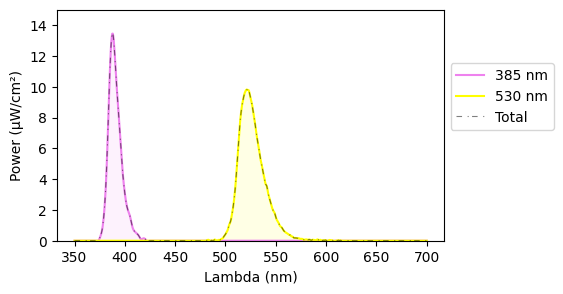

In [107]:
# First movie Violet frame
# ----------------------------------------
violet = 0.378 #0.5 #53970030448
blue   = 0 
green = 0
yellow = 0.557 #0.5 #0.175
red    = 0

First_Movie_Vframe_color_settings = [violet,blue,green,yellow,red]

First_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

First_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

First_Movie_ISO_result = IlluminanceFactor(First_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(First_Movie_ISO_result,F=0)

#Print voltages
print('\n WRONG Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, First_Movie_Vframe_color_settings, ylim = [0,15])


#### Second Movie (Blue + Green + Yellow)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟢 + 🔵 Green and Blue LED sources

In [105]:
# Second movie Blue + Green frame
# ----------------------------------------

violet =    0
blue   =    0.035    # 0.177006226264
green  =    0.1472         # 0.048792600935
yellow =    0.558    # 0.175
red    = 0

Second_Movie_Bframe_color_settings = [violet,blue,green,yellow,red]

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     350207
Melanopsin  :     866773
Rhodopsin   :    2771574
Mcones      :    1340272
Red_opsin   :    1269256

 WRONG Voltages
redV    0.0  V
yellowV 2.162  V
greenV  0.0  V
blueV   0.0  V
violetV 1.397  V

 Right Voltages
redV    0.0  V
yellowV 1.901  V
greenV  0.0  V
blueV   0.0  V
violetV 1.9060000000000001  V


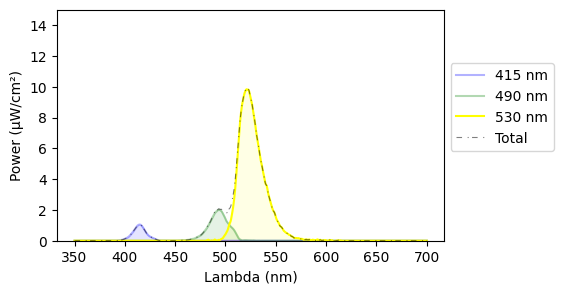

In [108]:
Second_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

Second_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

Second_Movie_ISO_result = IlluminanceFactor(Second_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(Second_Movie_ISO_result,F=0)

#Print voltages
print('\n WRONG Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, Second_Movie_Bframe_color_settings, ylim = [0,15])

# Extra (not used for now)

NameError: name 'perc_green' is not defined

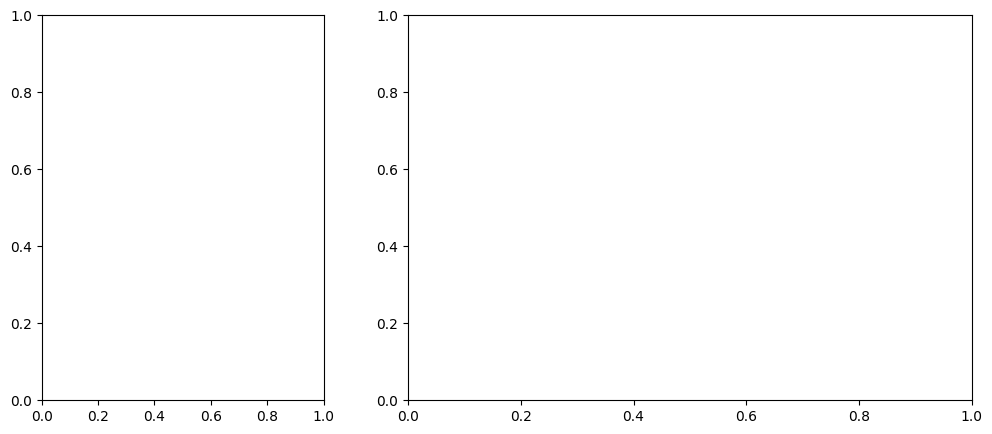

In [23]:
fig, ax = plt.subplots(figsize=(12, 5), ncols = 2, nrows = 1, gridspec_kw={'width_ratios': [1, 2]})

# pie plot 
pie_data = [perc_green,perc_violet]
labels = ['green','violet']
pie_colors = ['green','violet']

ax[0].pie(pie_data,labels=labels,autopct='%1.1f%%', colors=pie_colors)

ax[1].plot(x,my_light, 'k')
ax[1].set_xlabel('Lambda (nm)')
ax[1].set_ylabel('Power (µW/cm²)')
ax[1].fill_between(x,0,LEDs[0]*violet,alpha=0.3, color='violet')
ax[1].fill_between(x,0,LEDs[2]*green,alpha=0.3, color='green')
fig = plt.gcf()